In [1]:
from matplotlib import pyplot
import os

from summer.utils import ref_times_to_dti
from autumn.core.plots.utils import REF_DATE
from autumn.core.project import get_project, load_timeseries
from autumn.settings.region import Region

In [2]:
project = get_project("sm_sir", Region.HO_CHI_MINH_CITY)

In [3]:
update_params = {

}
params = project.param_set.baseline.update(update_params, calibration_format=True)


In [4]:
model = project.run_baseline_model(params)
derived_df = model.get_derived_outputs_df()

In [5]:
# for agegroup in params['age_groups']:
#     fig, axes = pyplot.subplots(1, 2, figsize=(10, 3))
#     for i_ax, immune_cat in enumerate(["low", "high"]):
#         output = f"prop_immune_{immune_cat}Xagegroup_{agegroup}"
#         axis = axes[i_ax]
#         derived_df[output].plot(ax=axis) 
#         axis.set_ylim((0, 1))
#         axis.set_title(immune_cat)
    
#     fig.suptitle(agegroup)


In [6]:
# derived_df.plot.area(y=["prop_immune_low", "prop_immune_high"])

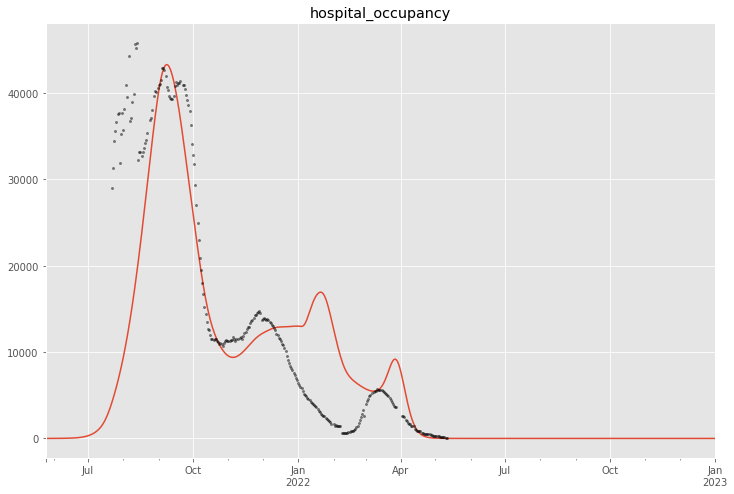

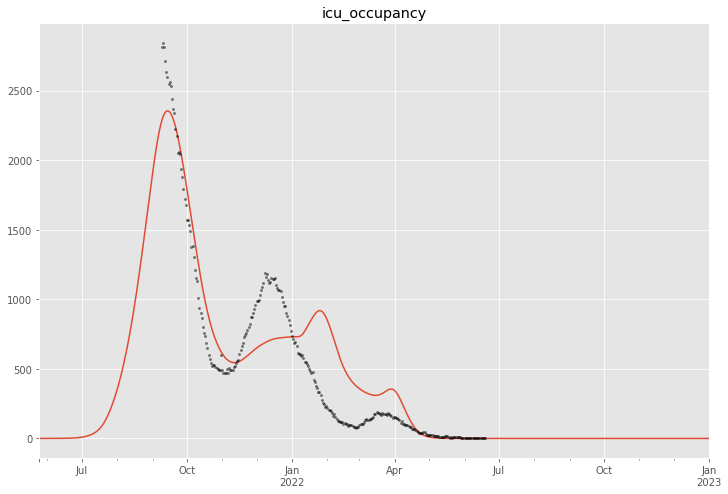

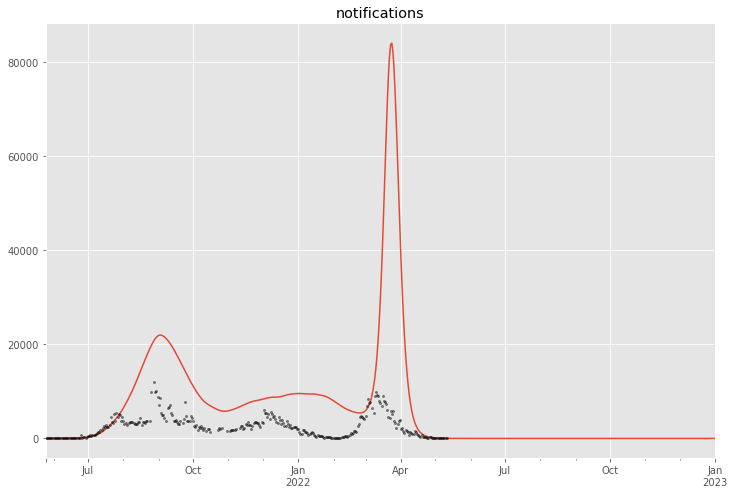

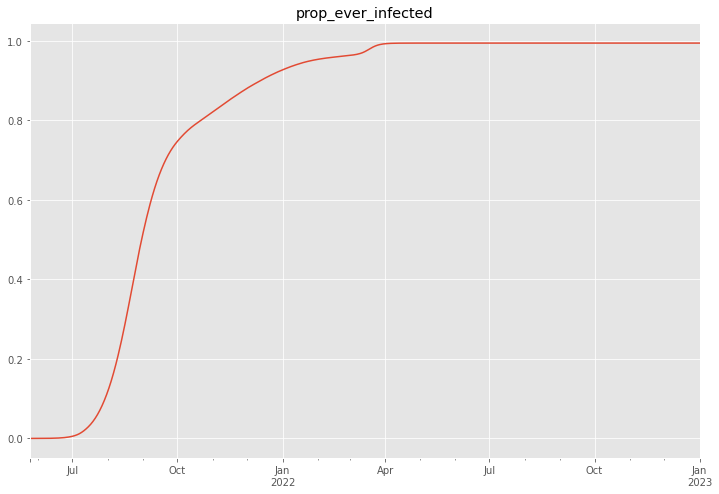

In [7]:
outputs = ["hospital_occupancy", "icu_occupancy", "notifications", "prop_ever_infected"] #, "hospital_admissions", "hospital_occupancy", "icu_admissions", "icu_occupancy"]

all_targets = load_timeseries(os.path.join(project.get_path(), "timeseries.json"))
if project.region_name == "national-capital-region":
    new_targets = load_timeseries(os.path.join(project.get_path(), "new_targets.json"))
    all_targets.update(new_targets)

for target in all_targets:
    all_targets[target].index = ref_times_to_dti(REF_DATE, all_targets[target].index)  

    
for output in outputs:
    fig = pyplot.figure(figsize=(12, 8))
    pyplot.style.use("ggplot")
    axis = fig.add_subplot()

    axis = derived_df[output].plot()
    axis.set_title(output)
    
    if output in project.plots:
        # all_targets[output].plot.line(ax=axis, linewidth=0., markersize=10., marker="o")
        axis.scatter(all_targets[output].index, all_targets[output], color="k", s=5, alpha=0.5, zorder=10)         
